In [1]:
!pip install rtree
!pip install geopandas

In [2]:
import pandas as pd  # provides interface for interacting with tabular data
import geopandas as gpd  # combines the capabilities of pandas and shapely for geospatial operations
from shapely.geometry import Point, Polygon, MultiPolygon  # for manipulating text data into geospatial shapes
from shapely import wkt  # stands for "well known text," allows for interchange across GIS programs
import rtree  # supports geospatial join

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [5]:
puds = gpd.read_file('Planned_Unit_Development__PUDs_.shp', crs = {'init' :'epsg:4326'}) 
aff = pd.read_csv('Affordable_Housing.csv')
crosswalk = pd.read_csv('zoning_crosswalk.csv')

In [6]:
# Create a geometry column in the affordable housing dataframe
aff['geometry'] = aff.apply(lambda row: Point(row.X, row.Y), axis=1)
aff = gpd.GeoDataFrame(aff, crs={'init' :'epsg:4326'})

In [7]:
# Use geospatial join to identify which PUDs include affordable housing projects
puds_aff = gpd.sjoin(puds, aff, op='intersects', how='left')

In [8]:
puds_aff[puds_aff.PROJECT_NAME.notna()]

,OBJECTID_left,PUD_NAME,PUD_WEB_UR,PUD_CHANGE,PUD_ZONING,PUD_STATUS,PUD_CASE_N,GLOBALID,WARD,SHAPEAREA,SHAPELEN,geometry,index_right,X,Y,OBJECTID_right,MAR_WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,LONGITUDE,AFFORDABLE_UNITS_AT_0_30_AMI,AFFORDABLE_UNITS_AT_31_50_AMI,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,ADDRESS_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM
27,137307,H Street Community Development Corp,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"Official Digital Zoning Map of July 1, 2010",None,Final,05-25A,{32993D3A-61FE-4F50-881C-0B79E9F2F9CC},Ward 5,0,0,"POLYGON ((-77.00043 38.92096, -76.99929 38.920...",21.0,-77.000098,38.920716,28.0,Ward 5,"2321 4th Street Northeast, Washington, Distric...",2321 4th Street (Rhode Island Avenue Gateway PUD),Completed 2015 to Date,DCHA DCHFA DHCD,116.0,38.920756,-77.000143,20.0,0.0,96.0,0.0,0.0,NaN,289738.0,399991.66,139204.05,2321 4TH STREET NE,2020/09/21 04:00:29+00
41,137321,Mill Creek Residential Trust,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"Setdown 3/9/15, Approved 7/13/15, DC Register ...",C-3-C,Final,05-38C,{1E52D31C-D622-43D1-AE18-EE4AAC87DDC7},Ward 6,0,0,"POLYGON ((-77.01896 38.87663, -77.01973 38.876...",227.0,-77.019373,38.876740,1183.0,Ward 6,"465 M Street Southwest, Washington, District o...",The View at the Waterfront South,Completed 2015 to Date,DHCD OP,4.0,38.876698,-77.019234,0.0,0.0,0.0,4.0,0.0,02-38D,306776.0,398319.12,134322.58,465 M STREET SW,2020/09/21 04:00:29+00
41,137321,Mill Creek Residential Trust,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"Setdown 3/9/15, Approved 7/13/15, DC Register ...",C-3-C,Final,05-38C,{1E52D31C-D622-43D1-AE18-EE4AAC87DDC7},Ward 6,0,0,"POLYGON ((-77.01896 38.87663, -77.01973 38.876...",226.0,-77.019328,38.878229,1182.0,Ward 6,"480 K Street Southwest, Washington, District o...",The View at the Waterfront North,Completed 2015 to Date,DHCD,5.0,38.878222,-77.019325,0.0,0.0,0.0,5.0,0.0,NaN,306773.0,398323.14,134487.89,480 K STREET SW,2020/09/21 04:00:29+00
50,137330,Broadway Atlantic One LLC,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"Official Digital Zoning Map of July 1, 2010",None,Final,05-17C/05-32C,{5D5438A8-EE9C-452B-99A5-29BAE6E7A28B},Ward 1,0,0,"MULTIPOLYGON (((-77.02303 38.91789, -77.02341 ...",414.0,-77.024610,38.919250,1583.0,Ward 1,"945 Florida Avenue NW, Washington, District of...",Atlantic Plumbing,Completed 2015 to Date,DHCD,22.0,38.919242,-77.024608,0.0,0.0,0.0,22.0,0.0,NaN,304678.0,397866.02,139041.58,945 FLORIDA AVENUE NW,2020/09/21 04:00:29+00
50,137330,Broadway Atlantic One LLC,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"Official Digital Zoning Map of July 1, 2010",None,Final,05-17C/05-32C,{5D5438A8-EE9C-452B-99A5-29BAE6E7A28B},Ward 1,0,0,"MULTIPOLYGON (((-77.02303 38.91789, -77.02341 ...",19.0,-77.023091,38.917542,20.0,Ward 1,"2030 8th St NW, Washington, District of Columb...",Atlantic Plumbing,Completed 2015 to Date,DHCD,6.0,38.917535,-77.023088,0.0,0.0,0.0,6.0,0.0,NaN,284162.0,397997.72,138852.02,2030 8TH STREET NW,2020/09/21 04:00:29+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,137566,"Enterprise Community Development, Inc.",https://app.dcoz.dc.gov/Content/Search/ViewCas...,Setdown 06/29/2020,None,Pending,66-68A,{899878C0-B186-430E-BAE4-E1AC9D8289AE},Ward 5,0,0,"POLYGON ((-77.00043 38.92239, -77.00043 38.922...",58.0,-76.996628,38.924615,116.0,Ward 5,"625 Edgewood St NE, Washington, District of Co...",Edgewood Terrace I,Completed 2015 to Date,DCHFA,292.0,38.924608,-76.996625,0.0,0.0,202.0,90.0,0.0,NaN,289575.0,400292.63,139636.93,625 EDGEWOOD STREET NE,2020/09/21 04:00:29+00
288,137568,CP Market Terminal LLC,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"PUD Modification of Consequence, Building C-1,...",C-3-C,Final,15-27D,{AB29B5E0-D3C7-41E8-B7DF-29EE6095053D},Ward 5,0,0,

In [9]:
# Merge dataframe with zoning categories crosswalk
puds_info = puds_aff.merge(crosswalk[['Zone_Cat']], how='left', left_on='PUD_ZONING', right_on=crosswalk['Zone'])

In [11]:
!pip install descartes

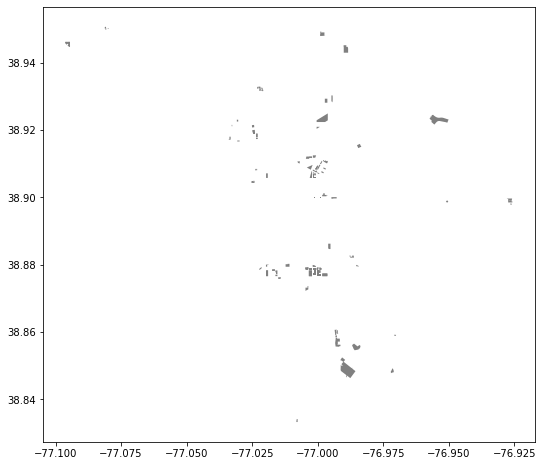

In [12]:
# Create a map of just the PUDs that provide Affordable Housing
puds_info[puds_info['TOTAL_AFFORDABLE_UNITS']>0].plot(column='TOTAL_AFFORDABLE_UNITS', color='grey', figsize=(16,8));

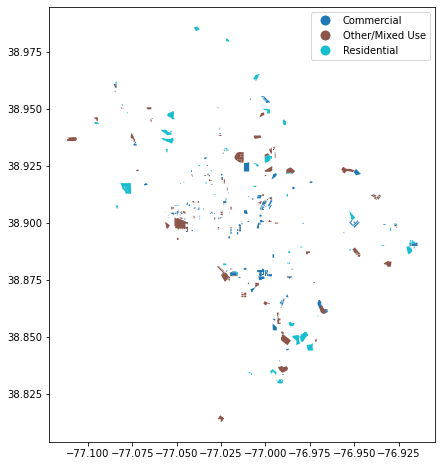

In [13]:
# Create a map of PUDs by Zoning Category
puds_info.plot(column='Zone_Cat', legend=True, figsize=(16,8));